In [6]:
import numpy as np # Linear Algebra
import pandas as pd # CSV file I/0 and dataframe based data processing

import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
import bs4

# Not quite sure what these do
from fastnumbers import isfloat
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool

# This is for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tidylib import tidy_document # for tidying incorrect html

# Not quite sure about these either
sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Converts strings to numbers if can be converted. '%' and ',' included
def ffloat(string):
    if string is None:
        return np.nan
    if type(string)==float or type(string)==np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    return fast_float(string.split(" ")[0].replace(',','').replace('%', ''), default=np.nan)

# Converts to a list of strings
def ffloat_list(string_list):
    return list(map(ffloat,string_list))

# Remove multiple spaces from within string
def remove_multiple_spaces(string):
    if type(string)==str:
        return ' '.join(string.split())
    return string

In [8]:
# Getting a page and its status
response = requests.get('http://www.example.com/', timeout=240)
response.status_code
response.content

200

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [18]:
url = "https://jsonplaceholder.typicode.com/posts/1"
response = requests.get(url, timeout=240)
response.status_code
response.json()

content = response.json()
content.keys()

200

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

dict_keys(['userId', 'id', 'title', 'body'])

In [41]:
# Rendering HTML strings 
from IPython.core.display import HTML
HTML("<b>Rendered HTML</b>")

#Gets the title of the stock
response = requests.get("https://www.moneycontrol.com/india/stockpricequote/auto-2-3-wheelers/heromotocorp/HHM", timeout=240)
page_content = BeautifulSoup(response.content, "html.parser")
HTML(str(page_content.find("h1")))

# Gets the price and (percentage change)?
response = requests.get("https://www.moneycontrol.com/india/stockpricequote/auto-2-3-wheelers/heromotocorp/HHM", timeout=240)
content = BeautifulSoup(response.content, "html.parser")
price_div = content.find("span",attrs={"class":'span_price_change_prcnt grnpc1'})
HTML(str(price_div))
change = content.find("span",attrs={"class":'span_price_arrow green_arwup'})


In [47]:
def get_children(html_content):
    return [item for item in html_content.children if type(item)==bs4.element.Tag or len(str(item).replace("\n","").strip())>0]

In [42]:
def get_table_simple(table,is_table_tag=True):
    elems = table.find_all('tr') if is_table_tag else get_children(table)
    table_data = list()
    for row in elems:
        
        row_data = list()
        row_elems = get_children(row)
        for elem in row_elems:
            text = elem.text.strip().replace("\n","")
            text = remove_multiple_spaces(text)
            if len(text)==0:
                continue
            row_data.append(text)
        table_data.append(row_data)
    return table_data

In [48]:
html = '''
<html>
<body>
<div id="table" class="FL" style="width:210px; padding-right:10px">
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">MARKET CAP (Rs Cr)</div>
        <div class="FR gD_12">63,783.84</div>
        <div class="CL"></div>
    </div>
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">P/E</div>
        <div class="FR gD_12">17.27</div>
        <div class="CL"></div>
    </div>
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">BOOK VALUE (Rs)</div>
        <div class="FR gD_12">589.29</div>
        <div class="CL"></div>
    </div>
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">DIV (%)</div>
        <div class="FR gD_12">4750.00%</div>
        <div class="CL"></div>
    </div>
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">Market Lot</div>
        <div class="FR gD_12">1</div>
        <div class="CL"></div>
    </div>
    <div class="PA7 brdb">
        <div class="FL gL_10 UC">INDUSTRY P/E</div>
        <div class="FR gD_12">19.99</div>
        <div class="CL"></div>
    </div>
</div>
</body>
</html>
'''
HTML(html)
content = BeautifulSoup(html,"html.parser")
get_table_simple(content.find("div",attrs={"id":"table"}),is_table_tag=False)

[['MARKET CAP (Rs Cr)', '63,783.84'],
 ['P/E', '17.27'],
 ['BOOK VALUE (Rs)', '589.29'],
 ['DIV (%)', '4750.00%'],
 ['Market Lot', '1'],
 ['INDUSTRY P/E', '19.99']]

In [4]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = "57xdQFCx6Jz6DzA7yoqx"
apple = quandl.get('WIKI/AAPL')
ms = quandl.get('WIKI/MSFT')

ForbiddenError: (Status 403) (Quandl Error QEPx04) You must confirm your email address before accessing data. Please check your inbox for a confirmation email from us.

In [8]:
%matplotlib inline
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [7]:
print(apple.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


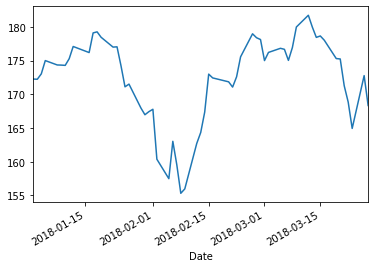

In [18]:
# Can choose one year by adding before the .plot()
apple['Adj. Close'].plot()

In [16]:
# Shows what the x-axis is based on
apple.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=9400, freq=None)

In [21]:
ms_price = ms[['Adj. Close']]
apple_price = apple[['Adj. Close']]
ms_price.rename(columns={'Adj. Close' : 'MSFT'}, inplace=True)
apple_price.rename(columns={'Adj. Close' : 'AAPL'}, inplace = True)



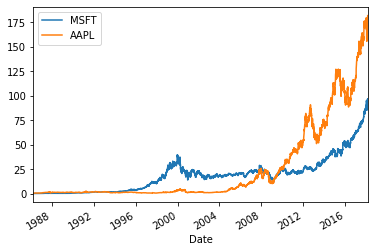

In [25]:
both_stocks = ms_price.join(apple_price, how="inner")
both_stocks.plot()